## Question 2
Fitting a linear regression model and finding the $R^2$ values for training and testing sets.

a. Building a linear model and looking at $R^2$ for training and testing dataset

In [1]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd 
import numpy as np 
import warnings 
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
warnings.filterwarnings("ignore")

In [2]:
# Loading the data from the CSV using Pandas
train_df = pd.read_csv('train.data.csv')
test_df = pd.read_csv('test.data.csv')

# Getting a preview into the dataset
train_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
4,7,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [3]:
# Selecting the predictors and the target
X_train = train_df[["bedrooms","bathrooms","sqft_living","sqft_lot"]]
y_train = train_df["price"]

X_test = test_df[["bedrooms","bathrooms","sqft_living","sqft_lot"]]
y_test = test_df["price"]

In [4]:
# Fitting the model using LinearRegression() in sklearn
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [5]:
# Calculating the R^2 for training and testing datasets
train_r2 = lm.score(X_train,y_train)
test_r2 = lm.score(X_test,y_test)
display(Markdown("$R^2 = $ {:.4f} for training and  $R^2 = $ {:.4f} for testing".format(train_r2,test_r2)))

$R^2 = $ 0.5101 for training and  $R^2 = $ 0.5050 for testing

b. Predicting the price of bill gates house

In [6]:
# Loading the data from the CSV using Pandas
fancy_house = pd.read_csv('fancyhouse.csv')

# Selecting the predictors
X_fancy = fancy_house[["bedrooms","bathrooms","sqft_living","sqft_lot"]]

# Using the model above for prediction
fancy_house_cost = lm.predict(X_fancy)[0]
display(Markdown("The cost of the fancy house is: ${:,.2f}".format(fancy_house_cost)))

The cost of the fancy house is: $15,436,769.54

c. Fitting a new model using the new feature engineered column and observing the $R^2$ values.

In [7]:
# Feature engineering a new variable
X_train["bed_bath"] = X_train["bedrooms"]*X_train["bathrooms"]
X_test["bed_bath"] = X_test["bedrooms"]*X_test["bathrooms"]

# Fitting the model using LinearRegression() in sklearn
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [8]:
# Calculating the R^2 for training and testing datasets
train2_r2 = lm2.score(X_train,y_train)
test2_r2 = lm2.score(X_test,y_test)
display(Markdown("$R^2 = $ {:.4f} for training and  $R^2 = $ {:.4f} for testing".format(train2_r2,test2_r2)))

$R^2 = $ 0.5174 for training and  $R^2 = $ 0.5105 for testing

d. Using gradient descent to get estimates closer to the estimates obtained in the above models.

In [9]:
# Implementing the gradient for given X and y
def gradient(X,y,betas):
    """
    Calculates the gradient of the loss function

    Args:
        X (np.matrix): Data Matrix (n x d)
        y (np.array): Response vector (n x 1)
        betas (np.array): Regression coefficients (d x 1)

    Returns:
        np.array: Vector containing gradient of the loss function
    """
    return (2/(X.shape[0]))*X.T @ ((X @ betas) - y)

# Implementing the gradient descent based on the above gradient
def gradient_descent(X,y,betas,learning_rate,tau = 10e-6):
    """
    Performs Gradient descent on the scaled dataset

    Args:
        X (np.matrix): Data Matrix (n x d)
        y (np.array): Response vector (n x 1)
        betas (np.array): Initial coefficient vector (d x 1)
        learning_rate (np.float64): Learning rate for gradient descent at which the algorithm converges
        tau (np.float64, optional): Threshold value used to determine the stopping point for the algorithm. 
        Defaults to 10e-6.

    Returns:
        np.array: True estimate of the regression coefficients
    """
    # Scale the data
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    
    # Adding a column of 1s to the data matrix
    X = np.hstack((np.ones((X.shape[0],1)),X))

    # Storing the norm of the gradient
    gradient_list = []
    
    # Starting the gradient descent algorithm
    while True:
        # Getting the gradient at the 't'th iteration
        gradients = gradient(X,y,betas)
        
        # Calculating the norm of the gradient
        gradient_norm = np.linalg.norm(gradients)
        gradient_list.append(gradient_norm)
        
        # Checking if the norm of the gradient is less than the threshold value
        if gradient_norm < tau:
            break
        
        # Updating the coefficients
        betas = betas - learning_rate*gradients
        
        
    # Returning the true coefficients
    return (betas,gradient_list,scalar)

In [10]:
# Creating the design matrix X 
X_train_grad = np.array(X_train[["bedrooms","bathrooms","sqft_living","sqft_lot"]])
X_test_grad = np.array(X_test[["bedrooms","bathrooms","sqft_living","sqft_lot"]])

y_train_grad = np.array(y_train).reshape(-1,1)
y_test_grad = np.array(y_test).reshape(-1,1)


In [11]:
# Running part (a) using the gradient descent algorithm
betas_hat, gradient_list, scalar = gradient_descent(X_train_grad,y_train_grad,np.zeros((X_train_grad.shape[1] + 1,1)),0.01)

In [12]:
# Preparing the X data for prediction
X_train_grad = scalar.transform(X_train_grad)
X_test_grad = scalar.transform(X_test_grad)

# Adding the intercept to the data matrix
X_train_grad = np.hstack((np.ones((X_train_grad.shape[0],1)),X_train_grad))
X_test_grad = np.hstack((np.ones((X_test_grad.shape[0],1)),X_test_grad))


In [13]:
# Trying to get R^2 for the training and testing datasets
y_pred_train = X_train_grad @ betas_hat
y_pred_test = X_test_grad @ betas_hat

# Calculating the R^2 for training and testing datasets using r2_score
train_grad_r2 = r2_score(y_train,y_pred_train)
test_grad_r2 = r2_score(y_test,y_pred_test)
display(Markdown("$R^2 = $ {:.4f} for training and  $R^2 = $ {:.4f} for testing".format(train_grad_r2,test_grad_r2)))

$R^2 = $ 0.5101 for training and  $R^2 = $ 0.5050 for testing

In [14]:
# Part (b) predicting the cost of the fancy house
# Selecting the predictors
X_fancy = np.array(fancy_house[["bedrooms","bathrooms","sqft_living","sqft_lot"]])
X_fancy = scalar.transform(X_fancy)
X_fancy = np.hstack((np.ones((X_fancy.shape[0],1)),X_fancy))

# Using the model above for prediction
fancy_house_cost = (X_fancy @ betas_hat)[0][0]
display(Markdown("The cost of the fancy house is: ${:,.2f}".format(fancy_house_cost)))

The cost of the fancy house is: $15,436,769.54

Text(0.5, 1.0, 'Gradient descent for part(a)')

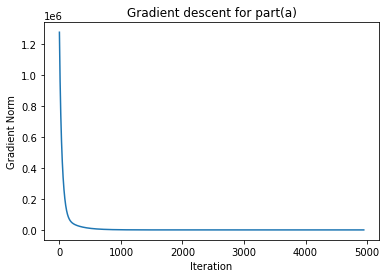

In [15]:
# Looking at the pattern of the gradient descent
plt.plot(gradient_list)
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm")
plt.title("Gradient descent for part(a)")

In [16]:
# Running part (c) using the gradient descent algorithm
X_train_gd1 = np.array(X_train[["bedrooms","bathrooms","sqft_living","sqft_lot","bed_bath"]])
X_test_gd1 = np.array(X_test[["bedrooms","bathrooms","sqft_living","sqft_lot","bed_bath"]])

# Getting response vector
y_train_gd1 = np.array(y_train).reshape(-1,1)
y_test_gd1 = np.array(y_test).reshape(-1,1)

In [17]:
# Gradient descent for (c)
betas_hat_2, gradient_list_2, scalar_2 = gradient_descent(X_train_gd1,y_train_gd1,np.zeros((X_train_grad.shape[1] + 1,1)),0.01)

In [18]:
# Preparing the X data for prediction
X_train_gd1 = scalar_2.transform(X_train_gd1)
X_test_gd1 = scalar_2.transform(X_test_gd1)

# Adding the intercept to the data matrix
X_train_gd1 = np.hstack((np.ones((X_train_gd1.shape[0],1)),X_train_gd1))
X_test_gd1 = np.hstack((np.ones((X_test_gd1.shape[0],1)),X_test_gd1))


In [19]:
# Trying to get R^2 for the training and testing datasets
y_pred_train = X_train_gd1 @ betas_hat_2
y_pred_test = X_test_gd1 @ betas_hat_2

# Calculating the R^2 for training and testing datasets using r2_score
train_grad_r2 = r2_score(y_train_gd1,y_pred_train)
test_grad_r2 = r2_score(y_test_gd1,y_pred_test)
display(Markdown("$R^2 = $ {:.4f} for training and  $R^2 = $ {:.4f} for testing".format(train_grad_r2,test_grad_r2)))

$R^2 = $ 0.5174 for training and  $R^2 = $ 0.5105 for testing

Text(0.5, 1.0, 'Gradient descent for part(c)')

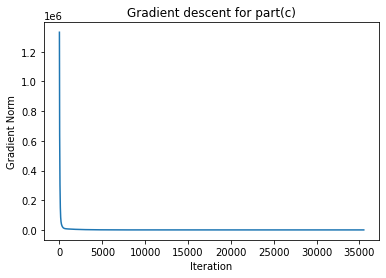

In [20]:
# Looking at the pattern of the gradient descent
plt.plot(gradient_list_2)
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm")
plt.title("Gradient descent for part(c)")

e. Implementing stochastic gradient descent and repeating parts (a),(b) & (c).

In [21]:
# Gradient for stochastic gradient descent
def get_gradient(X, Y, beta_hat, single_row = False):
    """
    Get the value of the gradient at beta hat
    """

    # estimate y_hat with current beta hats
    if single_row == True:
        X = X.reshape(1, -1)    
    
    y_hat = np.dot(X, beta_hat)
    
    # find the difference between y and y hat
    y_y_hat = y_hat.reshape(-1, 1) - Y.reshape(-1, 1)
    
    # calculate the dot product between X^T and (y - y hat)
    val = np.dot(X.T, y_y_hat) 

    return(val)

# Implementing stochastic gradient descent
def stochastic_gradient_descent(X, Y, random_state, batch_size = 10, a = .01, eps = 0.1, n_iter = 10, print_zeta_norm_flg = False):
    """
    Summary: 
    Run stochastic gradient descent to find beta hat from X and Y.

    Args:
        X (np.matrix): Design Matrix consisting of predictors (n x d).
        Y (np.array): Response vector (n x 1).
        random_state (int): Setting the seed for the random number generator.
        batch_size (int, optional): Setting the batch size for mini-batch version. Defaults to 10.
        a (float, optional): Value of alpha. Defaults to .01.
        eps (float, optional): Threshold term. Defaults to 0.1.
        n_iter (int, optional): Maximum iterations required to converge. Defaults to 10.
        print_zeta_norm_flg (bool, optional): Boolean value deciding whether to print 
                                            the gradient norms. Defaults to False.
    """
    # standardize X 
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)

    # get number of observations
    n_obs = X.shape[0]

    # add intercept
    X = np.hstack((np.ones(shape = (X.shape[0], 1)), X))

    # get optimal alpha and beta
    alpha, beta = a, 0

    # initialize beta starting point
    beta_hat = np.zeros(shape = (X.shape[1], 1))

    # initialize iterations 
    iter = 0

    # initialize zeta
    zeta = 0
    
    # initialize gradient
    gradient = np.inf

    # store gradient and zeta info 
    grad_zeta = []

    # start random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # make a list of indexes to shuffle
    r_indx = [x for x in range(X.shape[0])]

    # run the descent 
    while np.linalg.norm(gradient) > eps and iter < n_iter:

        # shuffle the data points
        rng.shuffle(r_indx)
        
        # update with just one point at a time 
        for start in range(0, n_obs, batch_size):
            
            # get batch 
            stop = start + batch_size
            indx = r_indx[start:stop]

            # get gradient at current beta
            gradient = get_gradient(X[indx], Y[indx], beta_hat, single_row=False)

            # update zeta
            zeta = beta * zeta + (1/batch_size) * alpha * gradient 

            # store gradient and zeta values 
            grad_zeta.append([np.linalg.norm(gradient)])

            # print magnitude of difference
            if print_zeta_norm_flg == True: 
                #print(np.linalg.norm(zeta))
                print(np.linalg.norm(gradient))
        
            # update beta hat
            beta_hat = beta_hat - zeta 

        # update iterator
        iter = iter + 1

    print("iterations {}".format(iter))

    return(beta_hat, scaler, grad_zeta)


In [22]:
def tr_inv_coeff(scaler, beta_hats):
    """Summary:
        Transform coefficients back to original scale
    

    Args:
        scaler (sklearn.preprocessing): Scalar object
        beta_hats (_type_): Betas to be transformed back to original scale
    """

    coeff = [(beta_hats[i+1]/scaler.scale_[i])[0] for i in range(len(scaler.scale_))]

    intercept = beta_hats[0] - np.sum(np.multiply([(beta_hats[i+1]/scaler.scale_[i])[0] for i in range(len(scaler.mean_))], scaler.mean_))
    intercept = [intercept[0]]

    all_coef = intercept + coeff

    return(all_coef)

In [23]:
# re-do part (a)
X = np.array(train_df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot']])
Y = np.array(train_df[['price']])
beta_hats_sgd, Xscaler, gz_sd = stochastic_gradient_descent(X, Y, batch_size = 1, a = 1.0e-04, random_state=1, eps = 1, n_iter=100, print_zeta_norm_flg=False) # 250 iterations takes [[90]] seconds

iterations 100


In [24]:
# Getting betas in the original scale
beta_sgd1 = tr_inv_coeff(Xscaler, beta_hats_sgd)

# Get R^2 for training data 
# add intercept
X_tr = np.hstack((np.ones(shape = (X.shape[0], 1)), X))

# get y hat/predicted value
y_pred = np.dot(X_tr, beta_sgd1)

# calculate sum of squares
resid_ss = ((train_df['price'] - y_pred)**2).sum()
total_ss = ((train_df['price'] - train_df['price'].mean()) ** 2).sum()

# calculate R^2
tr_r2 = 1 - resid_ss / total_ss

# get the r^2 for testing data
# subset data 
X_te = np.array(test_df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot']])

# add intercept
X_te = np.hstack((np.ones(shape = (X_te.shape[0], 1)), X_te))

# get predicted value
y_pred = np.dot(X_te, beta_sgd1)

# calculate sum of squares
resid_ss = ((test_df['price'] - y_pred)**2).sum()
total_ss = ((test_df['price'] - test_df['price'].mean()) ** 2).sum()

# calculate r^2
te_r2 = 1 - resid_ss / total_ss

# display results
display(Markdown(f'$R^2$ of the model on training data {np.round(tr_r2, 4)} and testing: {np.round(te_r2, 5)}'))

$R^2$ of the model on training data 0.5101 and testing: 0.50488

Text(0.5, 1.0, 'Stochastic Gradient descent for part(a)')

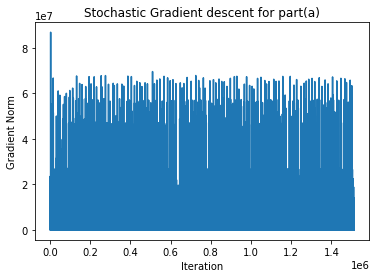

In [25]:
# Looking at the pattern of the stochastic gradient descent
plt.plot(gz_sd)
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm")
plt.title("Stochastic Gradient descent for part(a)")

In [26]:
# Redo question 2 (b)
# get the predicted price for the house
# add intercept 
# Selecting the predictors
X_fancy = np.array(fancy_house[["bedrooms","bathrooms","sqft_living","sqft_lot"]])
X_fancy = Xscaler.transform(X_fancy)
X_fancy = np.hstack((np.ones((X_fancy.shape[0],1)),X_fancy))

# Using the model above for prediction
fancy_house_cost = (X_fancy @ beta_hats_sgd)[0][0]
display(Markdown("The cost of the fancy house is: ${:,.2f}".format(fancy_house_cost)))

The cost of the fancy house is: $15,406,769.82

In [27]:
# Redo qustion 2 (c)
# Run gradient descent for the updated model
X = np.array(X_train[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'bed_bath']])
Y = np.array(y_train)
beta_hats_sgd2, Xscaler2, gz2 = stochastic_gradient_descent(X, Y, batch_size = 1, a = 1.0e-04, random_state=1, eps = 1, n_iter=100, print_zeta_norm_flg=False)

iterations 100


In [28]:
# transform betas 
beta_sgd2 = tr_inv_coeff(Xscaler2, beta_hats_sgd2)

In [29]:
# Get R^2 for training data 
# add intercept
X_tr = np.hstack((np.ones(shape = (X.shape[0], 1)), X))

# get y hat/predicted value
y_pred = np.dot(X_tr, beta_sgd2)

# calculate sum of squares
resid_ss = ((train_df['price'] - y_pred)**2).sum()
total_ss = ((train_df['price'] - train_df['price'].mean()) ** 2).sum()

# calculate R^2
tr_r2 = 1 - resid_ss / total_ss

# get the r^2 for testing data
# subset data 
X_te = np.array(X_test[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'bed_bath']])

# add intercept
X_te = np.hstack((np.ones(shape = (X_te.shape[0], 1)), X_te))

# get predicted value
y_pred = np.dot(X_te, beta_sgd2)

# calculate sum of squares
resid_ss = ((test_df['price'] - y_pred)**2).sum()
total_ss = ((test_df['price'] - test_df['price'].mean()) ** 2).sum()

# calculate r^2
te_r2 = 1 - resid_ss / total_ss

# display results
display(Markdown(f'$R^2$ of the model on training data {np.round(tr_r2, 5)} and testing: {np.round(te_r2, 4)}'))

$R^2$ of the model on training data 0.51734 and testing: 0.5104

Text(0.5, 1.0, 'Stochastic Gradient descent for part(c)')

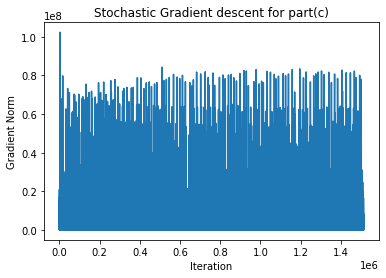

In [30]:
plt.plot(gz2)
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm")
plt.title("Stochastic Gradient descent for part(c)")